In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv(r"D:\advanced_training_AIML\Advanced-Training-AIML-Python-\Day-17\facebook data.csv")

In [20]:
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,529,512,262,432,92,3,1,1,0
1,2,photo,150,0,0,150,0,0,0,0,0
2,3,video,227,236,57,204,21,1,1,0,0
3,4,photo,111,0,0,111,0,0,0,0,0
4,5,photo,213,0,0,204,9,0,0,0,0


In [21]:
df["status_type"].unique()


array(['video', 'photo', 'link', 'status'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])
print(le.classes_)  # to see which label corresponds to which number


['link' 'photo' 'status' 'video']


In [23]:
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,529,512,262,432,92,3,1,1,0
1,2,1,150,0,0,150,0,0,0,0,0
2,3,3,227,236,57,204,21,1,1,0,0
3,4,1,111,0,0,111,0,0,0,0,0
4,5,1,213,0,0,204,9,0,0,0,0


In [24]:

df=df.drop('status_id',axis=1)

In [25]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df)
    WCSS.append(kmeans.inertia_)

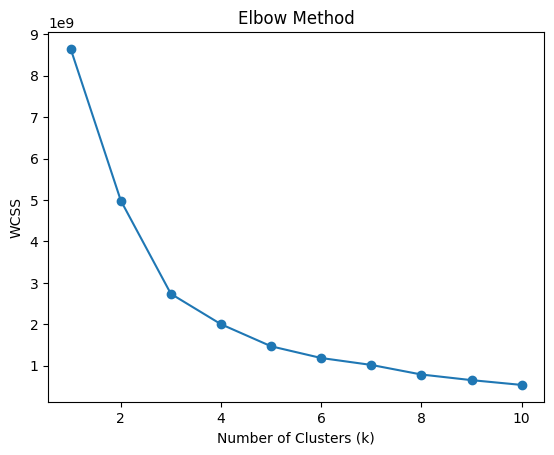

In [26]:
# Optional: plot the elbow curve
plt.plot(range(1, 11), WCSS, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [29]:
from sklearn.cluster import KMeans

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    print(f"For k = {k}, WCSS = {kmeans.inertia_}")


For k = 1, WCSS = 8645692195.266672
For k = 2, WCSS = 4986397875.914607
For k = 3, WCSS = 2735263885.7707653
For k = 4, WCSS = 2002154042.5570621
For k = 5, WCSS = 1469929375.1750765


In [30]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), WCSS, curve='convex', direction='decreasing')
print("Optimal number of clusters:", kl.elbow)


Optimal number of clusters: 3


In [32]:
optimal_k = kl.elbow  # or manually choose based on the plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(df)


,n_clusters,np.int64(3)
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [36]:
from sklearn.metrics import silhouette_score
coefficients = []  # To store silhouette scores

for k in range(2, 11):  # Silhouette score is valid only for k >= 2
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    score = silhouette_score(df, labels)
    coefficients.append(score)
    print(f"For n_clusters = {k}, Silhouette Score = {score}")


For n_clusters = 2, Silhouette Score = 0.8721887987065559
For n_clusters = 3, Silhouette Score = 0.8121362145545791
For n_clusters = 4, Silhouette Score = 0.8175569885388427
For n_clusters = 5, Silhouette Score = 0.7851527120560737
For n_clusters = 6, Silhouette Score = 0.7599507900789028
For n_clusters = 7, Silhouette Score = 0.7658000038959328
For n_clusters = 8, Silhouette Score = 0.6501104337269666
For n_clusters = 9, Silhouette Score = 0.669346256687506
For n_clusters = 10, Silhouette Score = 0.6585739515163822


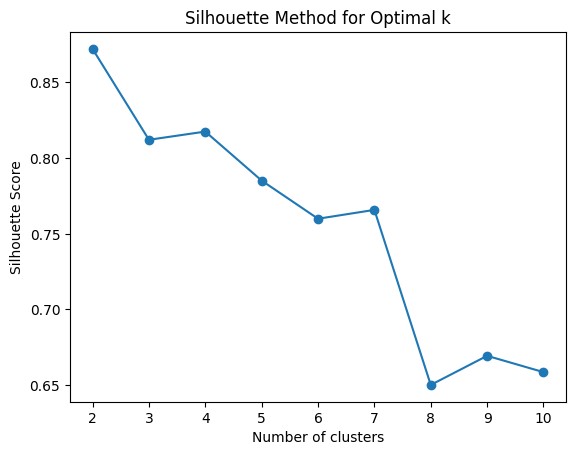

In [37]:
plt.plot(range(2, 11), coefficients, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()